In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import data
df = pd.read_csv('df_nontemporal.csv')
df.fillna(0,inplace=True)

In [18]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

X = df.iloc[:,np.arange(4,len(df.columns)).tolist()]
t = df['mood']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.2, random_state = 32)

#Initiate model
rf = RandomForestRegressor(n_estimators = 50, random_state = 32)
rf.fit(X_train, t_train)
t_pred=rf.predict(X_test)
MSE=mean_squared_error(t_test,t_pred)
print(MSE)

0.05490094390133429


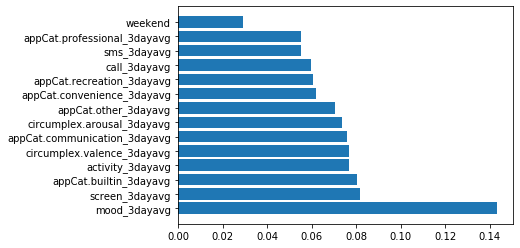

In [19]:
#Feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances.index,feature_importances.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('rf_importance.jpg')

In [20]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None, 10, 20, 40],#, 60, 80, 100],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 4],
    'min_samples_split': [2],
    'n_estimators': [50, 100, 200, 500]
}

# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = RandomForestRegressor(random_state=32), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 10)

rf_grid.fit(X_train, t_train.values.ravel())
print(rf_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   30.0s finished


{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [22]:
t_pred=rf_grid.best_estimator_.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.054847407472839865


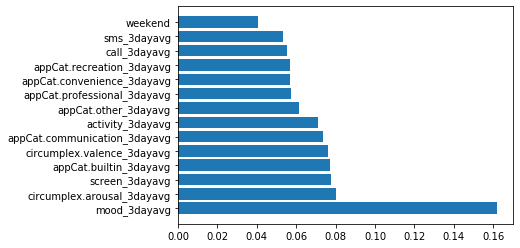

In [23]:
#Feature importance
rf2 = RandomForestRegressor(n_estimators = 200, max_depth=10,min_samples_leaf=4,min_samples_split=2,bootstrap=True, random_state = 32)
rf2.fit(X_train, t_train)

feature_importances2 = pd.DataFrame(rf2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances2.index,feature_importances2.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('rfgrid_importance.jpg')

In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# simple fit
AdaB = AdaBoostRegressor(
    base_estimator = DecisionTreeRegressor(max_depth=None),
    n_estimators=50, random_state=32)
AdaB.fit(X_train,t_train.values.ravel());


In [25]:
t_pred=AdaB.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.05950306323858451


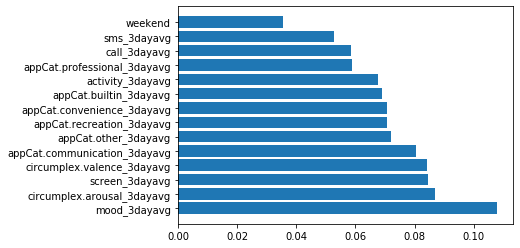

In [26]:
#Feature importance
feature_importances3 = pd.DataFrame(AdaB.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances3.index,feature_importances3.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('ad_importance.jpg')

In [27]:
# sample param_grid for gridsearch later
# note the base_estimator__ to tune the decision tree hyper parameters
param_grid = {
    "base_estimator__max_depth" : [1,2,5,None],
    "n_estimators": [1,2,10,20,50,100,500],
    "learning_rate": [1, 0.5, 0.2, 0.1],
}
AdaB_grid = GridSearchCV(estimator = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=32), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 5)
AdaB_grid.fit(X_train, t_train.values.ravel())
print(AdaB_grid.best_params_)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s


{'base_estimator__max_depth': 5, 'learning_rate': 0.2, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:   15.3s finished


In [28]:
t_pred=AdaB_grid.best_estimator_.predict(X_test)
MSE=mean_squared_error(t_test.values.ravel(),t_pred)
print(MSE)

0.058260884326664375


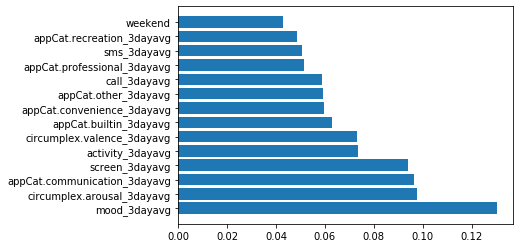

In [29]:
#Feature importance
ad2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),n_estimators = 50, random_state = 32,learning_rate=0.2)
ad2.fit(X_train, t_train)

feature_importances4 = pd.DataFrame(ad2.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

fig = plt.figure()
plt.barh(feature_importances4.index,feature_importances4.importance)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig('adgrid_importance.jpg')

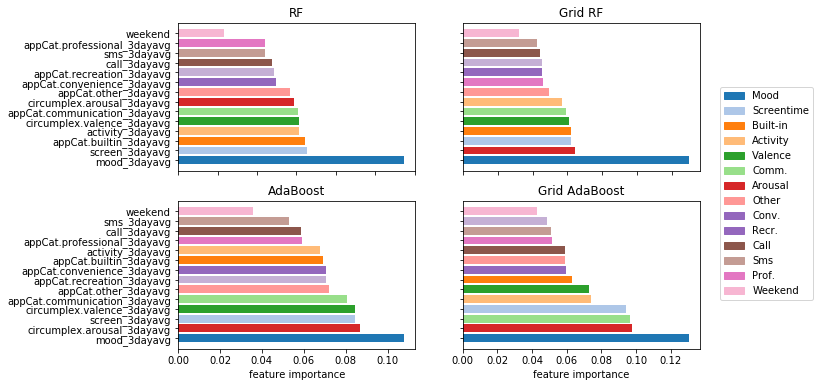

In [36]:
import matplotlib.patches as mpatches
rf_help = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
rf_grid_help = [0,6,1,2,4,5,3,7,12,8,9,10,11,13]
ad_help = [0,6,1,4,5,7,9,8,2,3,12,10,11,13]
ad_help_grid = [0,6,5,1,3,4,2,8,7,10,12,11,9,13]

fig, axs = plt.subplots(2, 2, figsize=(10,6))
palette = plt.get_cmap('tab20')
l1 = axs[0, 0].barh(feature_importances.index,feature_importances.importance, color=palette(rf_help))
axs[0, 0].set_title('RF')
l2 = axs[0, 1].barh(feature_importances2.index,feature_importances2.importance, color=palette(rf_grid_help))
axs[0, 1].set_title('Grid RF')
l3 = axs[1, 0].barh(feature_importances3.index,feature_importances3.importance,color=palette(ad_help))
axs[1, 0].set_title('AdaBoost')
l4 = axs[1, 1].barh(feature_importances4.index,feature_importances4.importance, color=palette(ad_help_grid))
axs[1, 1].set_title('Grid AdaBoost')

for ax in axs.flat:
           ax.set(xlabel='feature importance')
    
#for ax in axs:
    #ax.set_xticks([])
    #ax.set_yticks([])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
mood = mpatches.Patch(color=palette(0), label='Mood')
screen = mpatches.Patch(color=palette(1), label='Screentime')
builtin = mpatches.Patch(color=palette(2), label='Built-in')
activ = mpatches.Patch(color=palette(3), label='Activity')
valence = mpatches.Patch(color=palette(4), label='Valence')
comm = mpatches.Patch(color=palette(5), label='Comm.')
arousal = mpatches.Patch(color=palette(6), label='Arousal')
other = mpatches.Patch(color=palette(7), label='Other')
conven = mpatches.Patch(color=palette(8), label='Conv.')
recre = mpatches.Patch(color=palette(8), label='Recr.')
call = mpatches.Patch(color=palette(10), label='Call')
sms = mpatches.Patch(color=palette(11), label='Sms')
prof = mpatches.Patch(color=palette(12), label='Prof.')
weekend = mpatches.Patch(color=palette(13), label='Weekend')



fig.legend(handles=[mood, screen, builtin, activ, valence, comm, arousal, other, conven, recre, call, sms, prof, weekend],loc="center right", borderaxespad=0.1)
   
plt.subplots_adjust(right=0.85)

fig.savefig('trees_importance.pdf',dpi=300,)
